## Regresyon Agaçları (CART)

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection

In [180]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [175]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [193]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [140]:
cart_model = DecisionTreeRegressor()

In [141]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [92]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

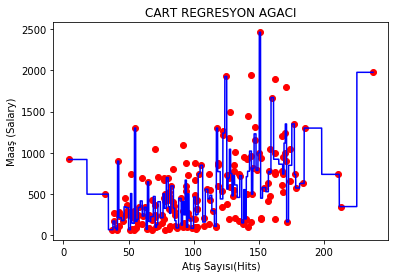

In [93]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "r")
plt.plot(X_grid, cart_model.predict(X_grid), color= "blue")
plt.title("CART REGRESYON AGACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)");

# Regresyon Problemini Gözlemledik

In [94]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 10)

In [95]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

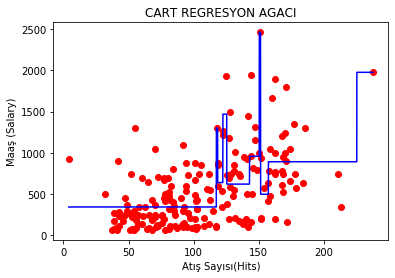

In [96]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "r")
plt.plot(X_grid, cart_model.predict(X_grid), color= "blue")
plt.title("CART REGRESYON AGACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)");

In [97]:
# Ağaç yapısı olarak göstermek istersek...

In [98]:
!pip install skompiler

In [99]:
from skompiler import skompile

In [100]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



### Tahmin

In [101]:
x = [91]

In [102]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

# Canlı sisteme entegresyona ugratmak.

345.2011551724138

In [103]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [104]:
cart_model.predict([[91]])

array([345.20115517])

In [105]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# ilkel test hatamız

486.34593105235456

### Model Tuning

In [181]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [182]:
np.sqrt(mean_squared_error(y_test, y_pred))

470.5229040620176

In [161]:
cart_params = {"min_samples_split": range(2, 100),
         "max_leaf_nodes": range(2, 10)}

In [183]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv= 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs

In [184]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [188]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes= 9, min_samples_split= 37)

In [189]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=37,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [190]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865

## Bagged Trees Regression

In [195]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [204]:
from sklearn.ensemble import BaggingRegressor

In [205]:
bag_model = BaggingRegressor(bootstrap_features= True)
bag_model.fit(X_train, y_train)

# n_estimators=10 --> 10 tane ağaç oluşturulacak demek oluyor.

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [206]:
bag_model.n_estimators

10

In [208]:
bag_model.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1340900539, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=765622737, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_dec

In [209]:
bag_model.estimators_samples_

[array([135,  67,  67,  62,  25, 189, 188, 156,  42,  67, 170,  83,  37,
         51,  76,  50,  97,  29, 120,  65, 143,  55, 180,  70,  95,  48,
         43,  92, 122,  84,  45, 175,  40, 179,  63, 128, 190, 147, 190,
        115,  50,  94,  92, 160, 112, 183,  90,  92,  46,  53, 142,  59,
         66, 146, 126, 117,   5,  34,  97,  48,  59,  51,  37, 117, 170,
         87, 170,   4, 170, 154,  72,  27, 164,  20,  24,  92,  37, 101,
         70, 170,  33,  87, 170,  21,  46,  92, 112,  74,  33,  51,  11,
          0, 112,  74, 133,  64,  64, 170,  59,  25,  91,  11, 143, 181,
        148, 163,  61, 195, 170,  62, 160,  41, 128, 120,   1,  11, 115,
        112,  88,  31, 149,  68,  34, 108, 146, 150, 160, 183,  45,  60,
         11,   7, 165, 106, 107, 120,  51, 183, 153,   6,   2, 144,  88,
        126,  50,   8, 139, 115, 166,  95, 136,  75,  28,  97, 167, 181,
        192, 146,  55,  44, 109,  95,  64, 177,   6, 121, 183,  94, 158,
        152, 125,  13, 103,  95,  57,   8,  67, 135

In [210]:
bag_model.estimators_features_

[array([ 4, 12,  5,  9, 11, 10,  8,  3, 11, 12, 18,  1,  0,  8, 10,  8, 17,
         6,  9]),
 array([ 6, 17, 18, 10, 17, 15,  8, 18, 12,  4,  2,  7,  0,  3, 10, 12, 14,
         3, 16]),
 array([ 7, 15, 18, 17,  5,  8,  6,  1,  0, 17, 15,  6,  9,  7,  0, 16,  0,
        12, 17]),
 array([15, 14, 10, 17, 16,  2,  3, 14,  8, 12,  3,  0, 11, 10,  7,  9,  7,
        10,  8]),
 array([ 0, 11,  6, 15, 15, 10,  8, 15,  9, 10,  0,  3, 14, 10, 11,  5,  3,
        16,  7]),
 array([ 2,  0,  6, 16, 13,  2,  2,  5, 12,  9,  8, 18, 11,  5,  7,  0, 18,
         9, 13]),
 array([15, 16, 16,  4,  8,  7,  2, 10, 18, 15, 17,  7,  5,  8, 13, 10,  7,
         2,  5]),
 array([10,  5,  4,  3, 12,  8,  4,  1, 17,  0,  3,  7,  6, 18, 16,  0,  3,
         5,  6]),
 array([ 4, 15,  9, 12,  7, 18, 17, 17,  1,  2, 18, 10,  8, 15,  4, 12, 12,
        12, 18]),
 array([ 0, 13, 15,  0,  1, 14, 12,  3, 16, 16, 14,  9, 12, 18, 14,  9, 10,
        11,  5])]

In [211]:
bag_model.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1340900539, splitter='best')

In [212]:
bag_model.estimators_[1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=765622737, splitter='best')

### Tahmin

In [218]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

381.25251764614757

In [219]:
two_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [220]:
np.sqrt(mean_squared_error(y_test, two_y_pred))

510.81319496523474

In [223]:
seven_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

In [224]:
np.sqrt(mean_squared_error(y_test, seven_y_pred))

539.2735484860278

### Model Tuning

In [225]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [226]:
bag_params = {"n_estimators": range(2,20)}

In [227]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [228]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(2, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [229]:
bag_cv_model.best_params_

{'n_estimators': 12}

In [230]:
bag_tuned = BaggingRegressor( n_estimators = 12, random_state = 45)

In [231]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=12,
                 n_jobs=None, oob_score=False, random_state=45, verbose=0,
                 warm_start=False)

In [232]:
y_pred = bag_tuned.predict(X_test)

In [233]:
np.sqrt(mean_squared_error(y_test, y_pred))

349.06722149329255